### Ask meaningful questionquestion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = pd.read_csv('cleaned_data.csv')

# Ensure Release Date is in datetime format
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61742 entries, 0 to 61741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game Title         61742 non-null  object        
 1   Game Genre         61742 non-null  object        
 2   Pricing            61742 non-null  float64       
 3   Developer          61742 non-null  object        
 4   Release Date       49170 non-null  datetime64[ns]
 5   Platform           61742 non-null  object        
 6   Rating             61742 non-null  float64       
 7   Number of Ratings  61742 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.8+ MB
None


### Question 1: How does the game genre influence the rating?
- Benefits: Understanding how the game genre influences ratings is essential for developers and publishers to prioritize their resources and efforts on genres that tend to perform well among players. For instance, if a particular genre like "Adventure" consistently receives higher ratings, developers can focus on creating innovative titles within that genre to capture audience interest. This analysis also helps identify niche genres that might have smaller but highly engaged audiences, allowing for targeted marketing and development strategies.

- How: Perform an exploratory data analysis (EDA) by grouping the data by game genre and calculating the average ratings for each genre. Genres with multiple categories should be split and analyzed individually to avoid misrepresentation. Visualize the results using bar plots for easy comparison of average ratings across genres. 


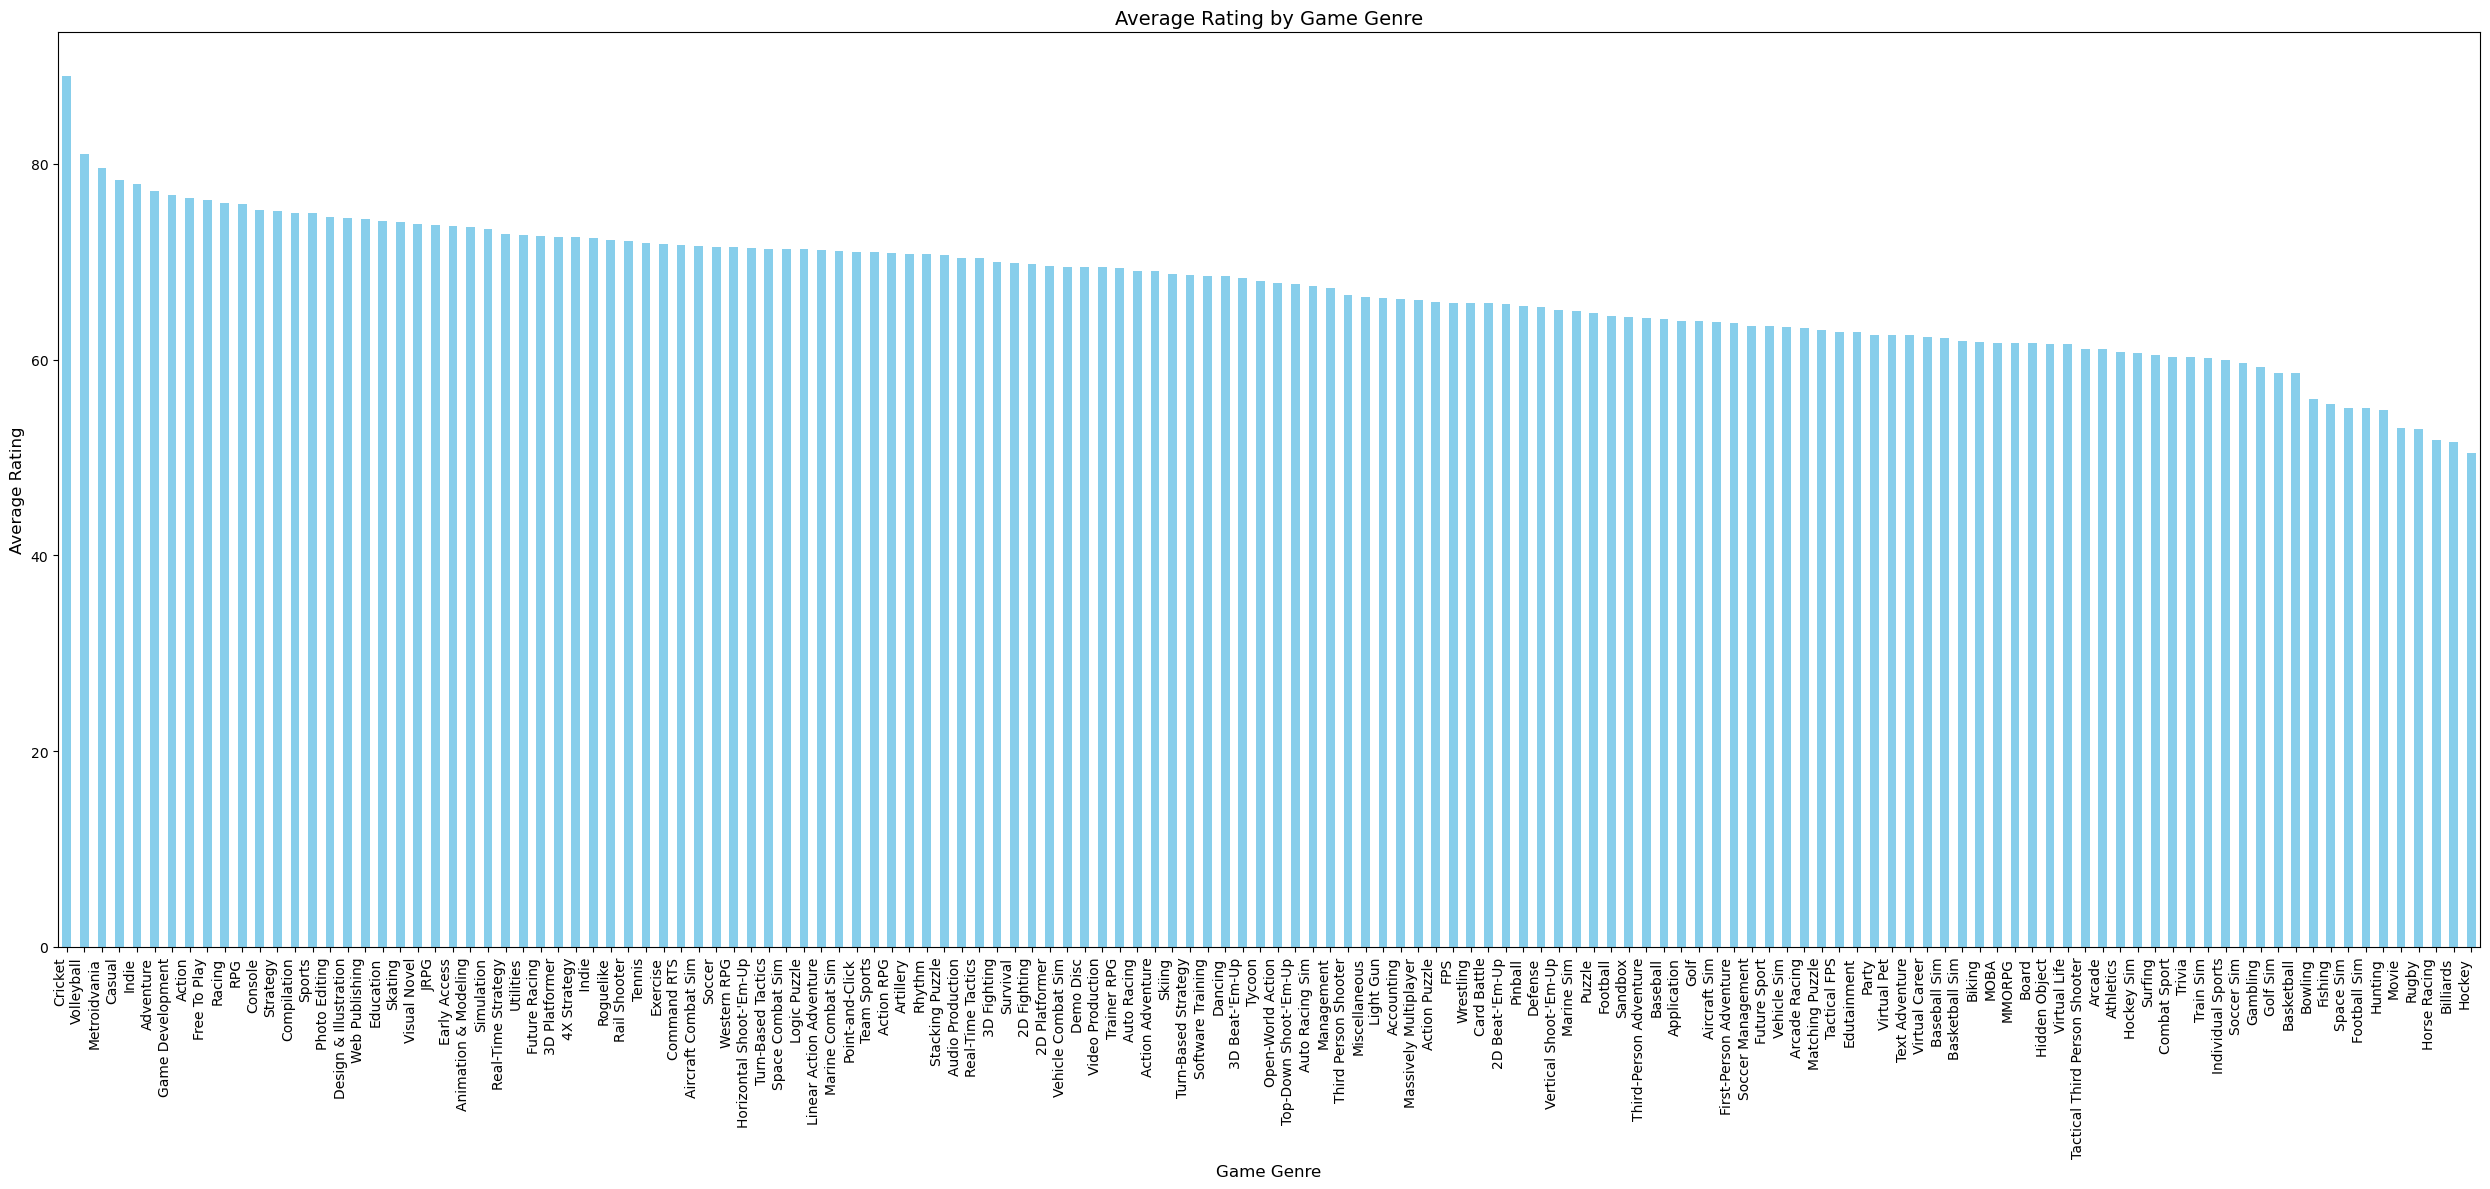

In [2]:
data['Game Genre'] = data['Game Genre'].str.split(', ')
genre_ratings = data.explode('Game Genre').groupby('Game Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(25, 12))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Game Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Game Genre', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


- Genres with the Highest Ratings:
  - The genre at the top (likely Cricket) has the highest average rating, exceeding 85.
  - Other genres in the upper tier (e.g., Volleyball, Metroidvania) consistently receive high praise, indicating strong engagement and popularity.
  - These genres may feature more polished gameplay mechanics, strong storytelling, or cutting-edge graphics.
  - High investments in production and marketing likely attract larger audiences and more favorable reviews.
- Mid-Tier Genres:
  - Genres in the middle (e.g., Action Adventure, Auto Racing) have moderately high ratings, averaging between 60-80.
  - While these genres are less dominant than top performers, they are still well-received and cater to niche audiences.
  - These games may lack universal appeal or high production budgets but still succeed due to innovative gameplay or loyal fanbases.
- Genres with the Lowest Ratings:
  - The genres at the bottom (e.g., Hockey, Billiards) have the lowest average ratings, around 50.
  - These genres may be less polished, niche-oriented, or fail to meet user expectations.
  - Potential lack of innovation or poor execution.
  - Limited appeal to broader audiences or outdated mechanics.

### Question 2: How do number of ratings vary by the release month?
- Benefits: Understanding how the number of ratings varies by the release month helps game developers and publishers optimize their release schedules to maximize engagement and visibility. It can identify peak times when players are more active and likely to leave reviews.
- How: Extract the month from the release date of each game. Group the data by the release month and calculate the total number of ratings for each month. Visualize the results using a bar plot to show how the total number of ratings fluctuates throughout the year.

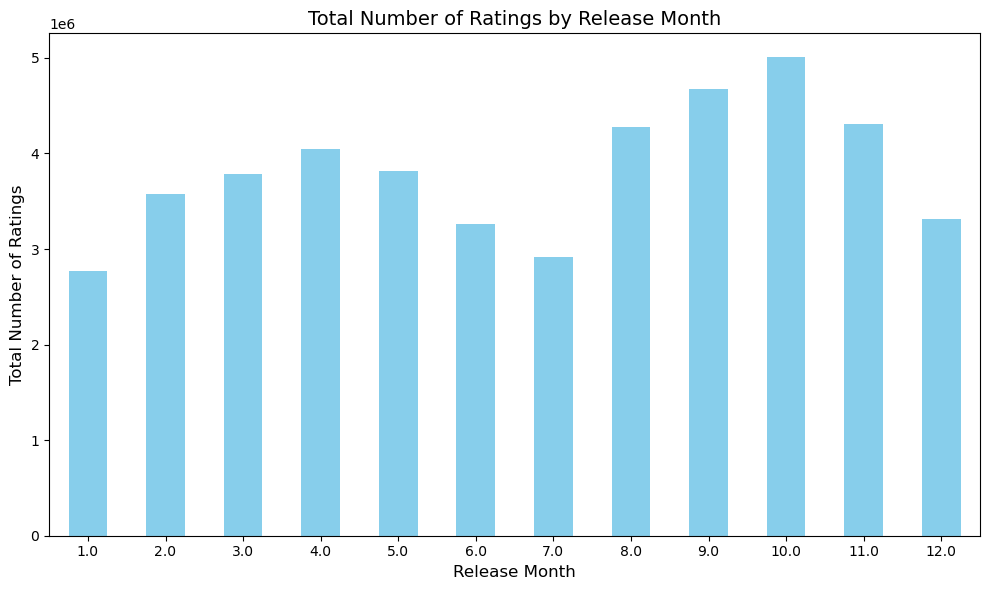

In [3]:
# Question: How do number of ratings vary by the release month?
data['Release Month'] = data['Release Date'].dt.month
month_ratings = data.groupby('Release Month')['Number of Ratings'].sum()

plt.figure(figsize=(10, 6))
month_ratings.plot(kind='bar', color='skyblue')
plt.title('Total Number of Ratings by Release Month', fontsize=14)
plt.ylabel('Total Number of Ratings', fontsize=12)
plt.xlabel('Release Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Seasonal Trends:
  - The spike in September and October may align with industry practices where major game releases are timed for the fall to maximize holiday sales and marketing.
  - Lower ratings in January and June might correspond to post-holiday lulls and mid-year breaks.
- Game Release Strategy: Developers and publishers may strategically choose the fall months to release games to maximize ratings and sales.
- Marketing Implications: For promotional campaigns, focusing on games released in peak months (e.g., September, October) could yield better results. Conversely, less crowded months (e.g., January, June) might be opportunities for niche games to stand out.

#### Question 3: How do number of ratings vary by the release day of month?
- Benefits: Analyzing how the number of ratings changes depending on the release day of the month helps developers and publishers understand whether certain release days are associated with higher user engagement. If specific days consistently result in a larger volume of ratings, titles launched on those days may benefit from increased visibility and feedback. This information can guide scheduling strategies (e.g., timing releases or updates to match these high-engagement days) and help optimize marketing efforts for game launches.

- How: To discover these insights, group the data by the release day of the month and compute the total (or average) number of ratings for each day. Days with fewer titles or missing data should be handled carefully to ensure accurate insights. Visualize the results using a bar chart, plotting the total ratings against each release day. This makes it easier to compare the distribution of ratings across different days of the month.



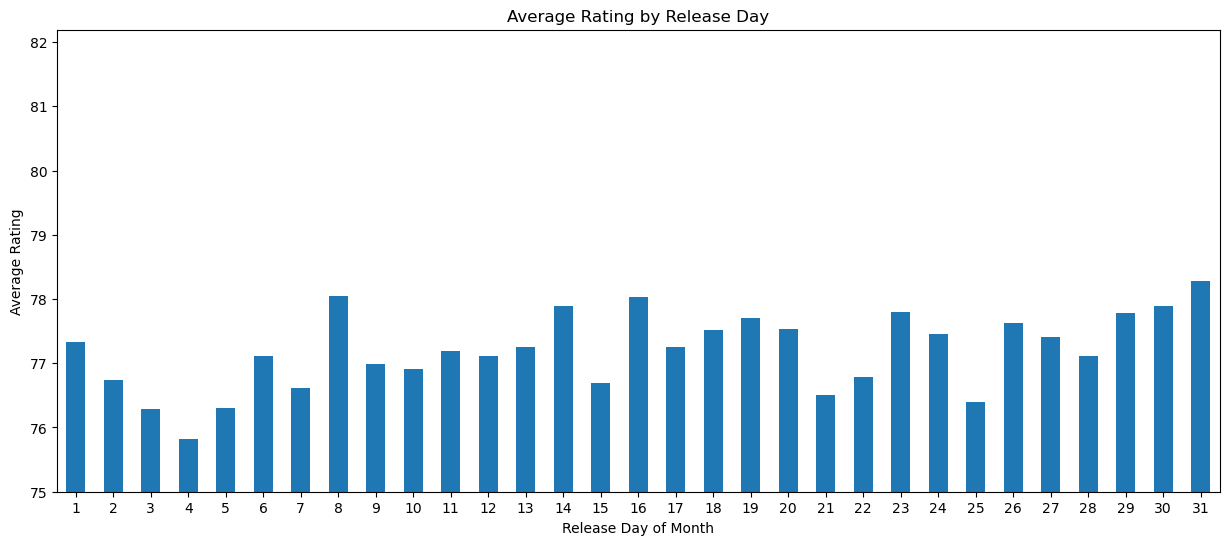

In [4]:
data['ReleaseMonth'] = data['Release Date'].dt.month
data['ReleaseDay'] = data['Release Date'].dt.day

# 1. Nhóm theo (ReleaseMonth, ReleaseDay) để tính trung bình Rating của từng ngày vào từng tháng
#    (tránh trường hợp ngày 31 không phải tháng nào cũng có)
grouped_temp = (
    data.dropna(subset=['ReleaseMonth', 'ReleaseDay', 'Rating'])
        .groupby(['ReleaseMonth', 'ReleaseDay'])['Rating']
        .mean()
        .reset_index()
)

# 2. Tính trung bình lại theo ReleaseDay (lấy trung bình trên các tháng có tồn tại ngày đó)
avg_ratings_by_day = grouped_temp.groupby('ReleaseDay')['Rating'].mean()

# 3. Vẽ biểu đồ
plt.figure(figsize=(15, 6))
avg_ratings_by_day.plot(kind='bar')
plt.xlabel('Release Day of Month')
plt.ylabel('Average Rating')
plt.ylim(bottom=75)
plt.title('Average Rating by Release Day')
plt.xticks(ticks=range(len(avg_ratings_by_day.index)), labels=[int(day) for day in avg_ratings_by_day.index], rotation=0)
plt.show()

- The average ratings seem relatively stable across most days of the month, with no significant peaks or troughs. This suggests that the day of release may not have a strong influence on a game's overall rating.
- There's no discernible pattern or trend in how ratings fluctuate from day to day. The slight variations could be due to random chance or other factors not captured in this data.
- Game developers and publishers may not need to heavily consider the day of the month when planning their release schedules. Factors like marketing campaigns, competition, and seasonal trends are likely more influential.
- Using the day of release alone won't be a reliable predictor of a game's rating. Other factors like genre, developer reputation, and critical reviews will play a much larger role.

#### Question 4: How do ratings vary by the release month?
- Benefits: Analyzing the variation in ratings by release month can help developers and publishers determine the optimal timing for launching new games. For example, releasing a game during months when players are more engaged, such as holidays or summer vacations, might result in higher ratings due to increased player activity and attention. Conversely, avoiding overcrowded release windows can help ensure better visibility and reception.

- How: Extract the release month from the release date column and group the data by month. Calculate the average ratings for each month to identify trends or patterns. Visualize the results using a line graph to show fluctuations in average ratings over the year. A heatmap can also be used to compare ratings across different months in a visually intuitive manner. This analysis can help guide release schedules for future titles.


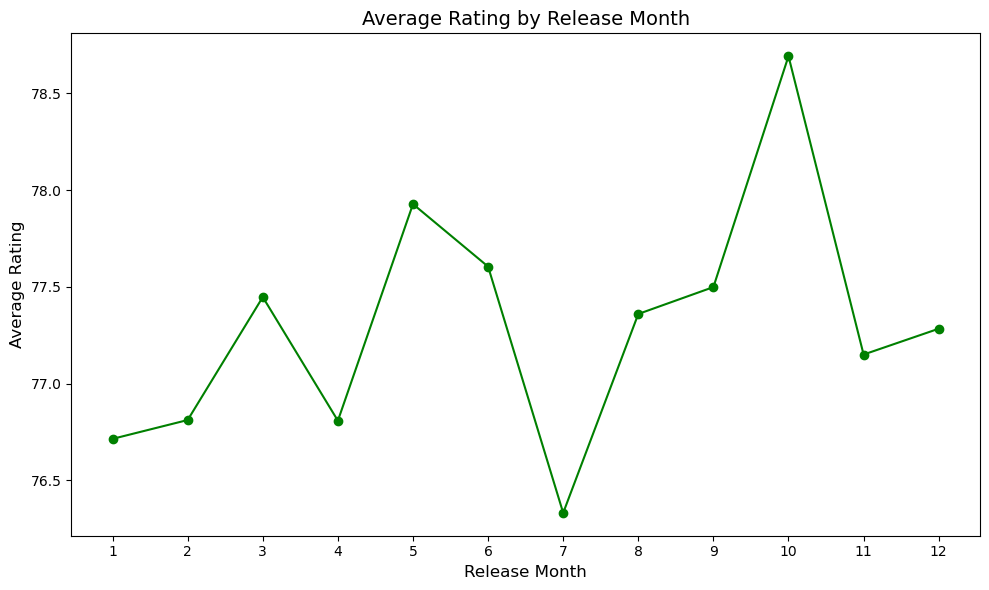

In [5]:
data['Release Month'] = data['Release Date'].dt.month
month_ratings = data.groupby('Release Month')['Rating'].mean()

plt.figure(figsize=(10, 6))
month_ratings.plot(kind='line', marker='o', color='green')
plt.title('Average Rating by Release Month', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Release Month', fontsize=12)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

- The graph clearly demonstrates a cyclical pattern in average game ratings across different months of the year. This suggests that the time of year a game is released can significantly influence its perceived quality.
- October consistently achieves the highest average rating, indicating it might be the optimal month for game releases. There might be industry-wide events or holidays centered around gaming in October, driving increased attention and engagement. Game publishers could be strategically releasing their most anticipated titles during this month to maximize exposure and sales.
- Conversely, months like July often exhibit lower average ratings, suggesting potential market saturation or decreased consumer interest during these periods. There could be a natural lull in game releases during July due to development cycles or industry conventions. Gamers might be less engaged with new releases during summer months, opting for outdoor activities or other entertainment.
- By aligning game releases with months that historically yield higher ratings, developers can potentially boost their games' success.

#### Question 5: Does the combination of genre and pricing affect the ratings?
- Benefits: Understanding the relationship between genre and pricing can help developers craft effective pricing strategies tailored to specific audiences. For instance, some genres may perform better at premium pricing, while others might thrive at lower price points due to broader accessibility. This analysis also aids publishers in positioning their games competitively in the market, balancing profitability with customer satisfaction.

- How: Group the data by both genre and pricing bins, and calculate the average ratings for each combination. Use a pivot table to organize the results and create a clustered bar chart to visualize how different pricing tiers perform within each genre. Consider dividing pricing into logical bins (e.g., Free, Budget, Mid-range, Premium) to standardize the analysis. This approach allows for a clearer understanding of how pricing interacts with genre to influence ratings.


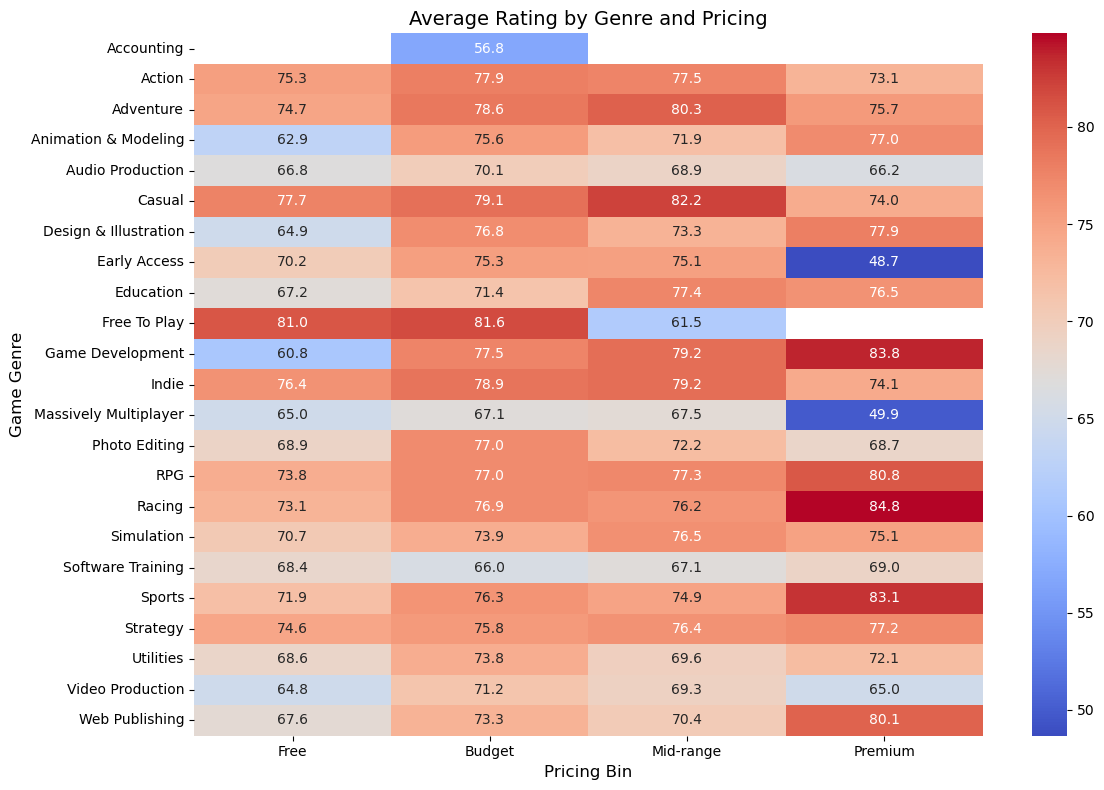

In [6]:
data['Pricing Bin'] = pd.cut(data['Pricing'], bins=[0, 5, 20, 60, float('inf')], labels=['Free', 'Budget', 'Mid-range', 'Premium'])
genre_pricing_ratings = data.explode('Game Genre').pivot_table(index='Game Genre', columns='Pricing Bin', values='Rating', aggfunc='mean', observed=True)

plt.figure(figsize=(12, 8))
sns.heatmap(genre_pricing_ratings, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Rating by Genre and Pricing', fontsize=14)
plt.ylabel('Game Genre', fontsize=12)
plt.xlabel('Pricing Bin', fontsize=12)
plt.tight_layout()
plt.show()

- The genre of a game significantly impacts its overall rating. Genres like RPG, Racing, and Strategy consistently receive higher ratings, suggesting that players value depth, competitiveness, and engaging storylines in these categories.
- Contrary to the assumption that higher prices equate to higher quality, the data suggests that premium-priced games don't always receive the highest ratings. This indicates that other factors, such as gameplay and content, play a more significant role in determining player satisfaction.
- Free-to-play games, especially those in the mid-range pricing tier, often achieve respectable ratings. This highlights the growing trend of high-quality free-to-play games that can compete with their paid counterparts.

#### Question 6: Does developer experience (number of games released) correlate with higher ratings?
- Benefits: Determining whether developer experience correlates with higher ratings can provide valuable insights into the importance of expertise in game development. If seasoned developers tend to achieve higher ratings, it could signal the value of experience, iteration, and player feedback in refining game quality. For investors and gamers, this analysis can help predict the potential success of new titles based on a developer's track record.

- How: Count the number of games released by each developer and calculate their average ratings. Use scatter plots to visualize the relationship between the number of games released and average ratings, and apply regression models to analyze the strength and direction of the correlation. Consider segmenting developers into categories based on experience levels (e.g., New, Intermediate, Veteran) to provide more granular insights. This analysis can highlight whether experience consistently translates into better ratings or if other factors also play significant roles.


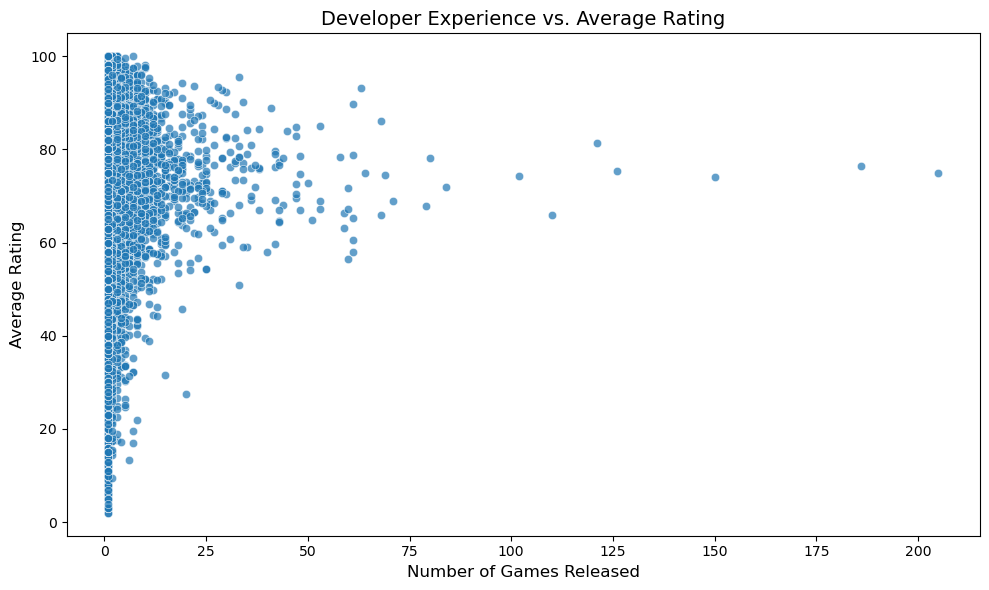

In [7]:
developer_experience = data.groupby('Developer').agg(
    games_released=('Game Title', 'count'),
    average_rating=('Rating', 'mean')
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=developer_experience, x='games_released', y='average_rating', alpha=0.7)
plt.title('Developer Experience vs. Average Rating', fontsize=14)
plt.xlabel('Number of Games Released', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

- There is no strong, linear relationship between the number of games a developer has released and the average rating of their games. This suggests that a developer's experience alone does not guarantee higher-rated games.
- The data points are widely scattered, indicating that many other factors beyond experience influence game ratings.
- While some experienced developers have created highly-rated games, there are also many instances of experienced developers producing games with lower ratings. This suggests that factors such as creative vision, market trends, and team dynamics can override the benefits of experience.
- The plot reveals that many new developers, with only a few games under their belt, have created critically acclaimed titles. This highlights the potential for innovative ideas and fresh perspectives to drive success.